In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set some nice defaults for plots
sns.set(style='whitegrid')

# Load the dataset
file_path = '../data/dih.csv' 
# (We use '../' to go 'up' one level from notebooks/ to the main folder, then 'down' into data/)
df = pd.read_csv(file_path)
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [4]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [5]:
df['Churn'].value_counts()

Churn
No     5174
Yes    1869
Name: count, dtype: int64

In [6]:
# See the rows where TotalCharges is just a space
df[df['TotalCharges'] == ' '].head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No


In [8]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df['TotalCharges'] = df['TotalCharges'].fillna(0)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [10]:
df = df.drop('customerID', axis=1)
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})

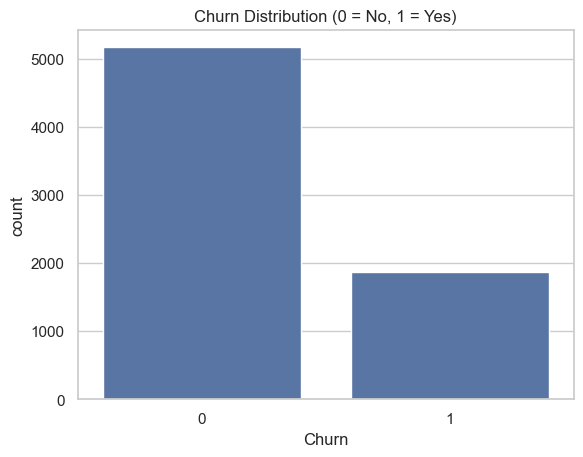

Churn
0    0.73463
1    0.26537
Name: proportion, dtype: float64


In [11]:
# Visualize the churn imbalance
sns.countplot(x='Churn', data=df)
plt.title('Churn Distribution (0 = No, 1 = Yes)')
plt.show()

# Print the exact numbers
print(df['Churn'].value_counts(normalize=True))

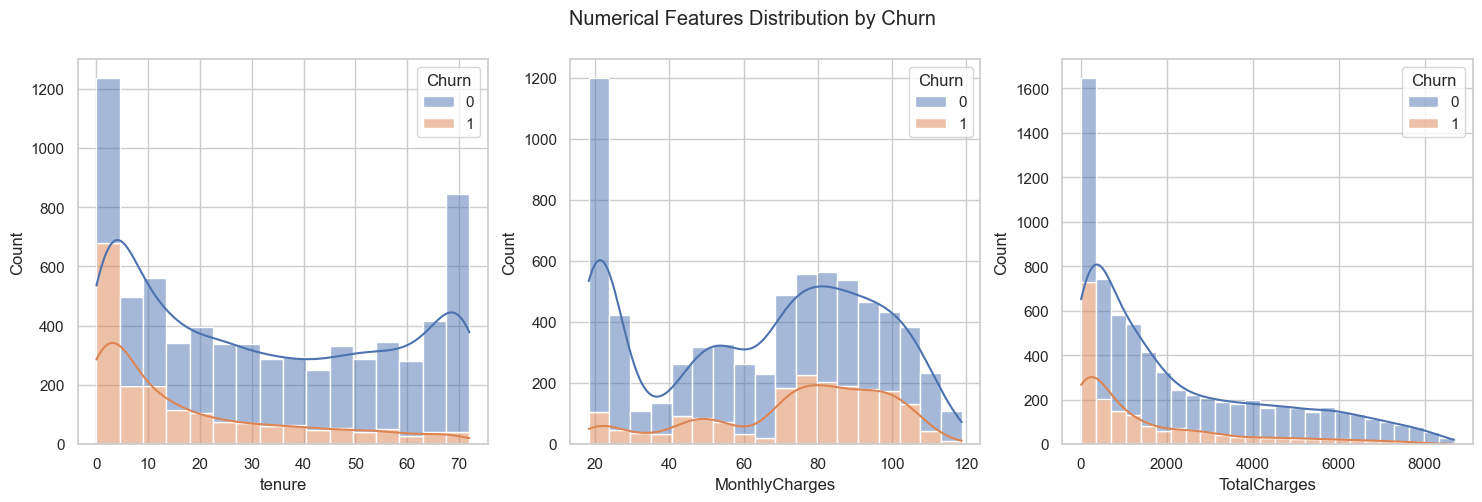

In [12]:
# Create histograms to compare distributions
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

sns.histplot(data=df, x='tenure', hue='Churn', kde=True, ax=axes[0], multiple="stack")
sns.histplot(data=df, x='MonthlyCharges', hue='Churn', kde=True, ax=axes[1], multiple="stack")
sns.histplot(data=df, x='TotalCharges', hue='Churn', kde=True, ax=axes[2], multiple="stack")

plt.suptitle('Numerical Features Distribution by Churn')
plt.show()

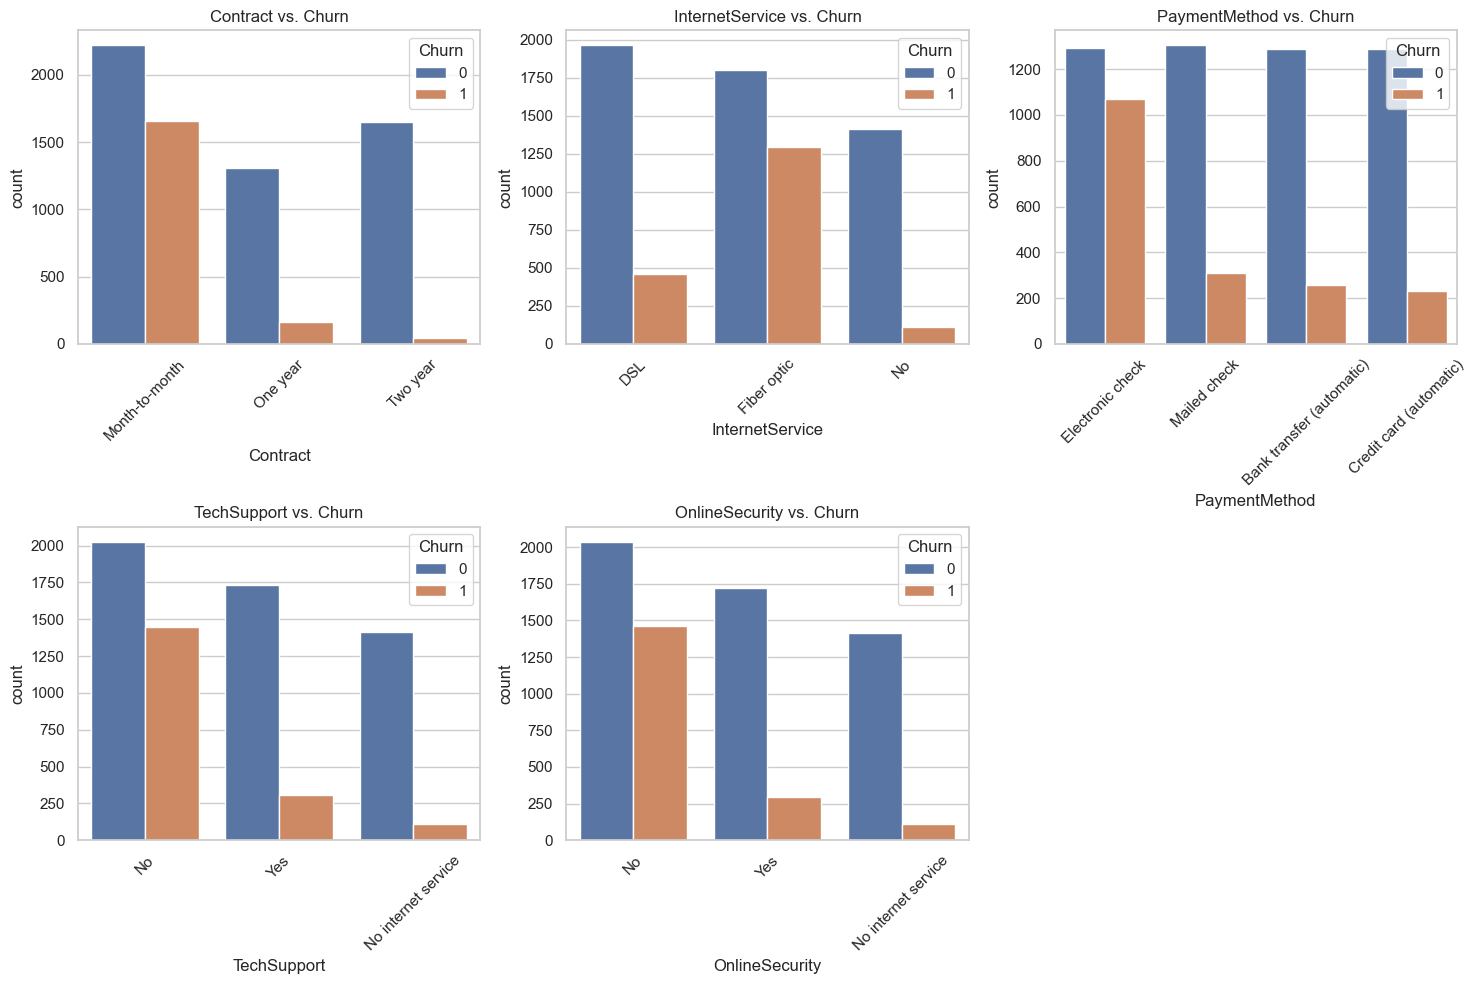

In [13]:
# List of key categorical columns to check
cat_cols = ['Contract', 'InternetService', 'PaymentMethod', 'TechSupport', 'OnlineSecurity']

plt.figure(figsize=(15, 10))
for i, col in enumerate(cat_cols):
    plt.subplot(2, 3, i + 1)
    # Create a count plot stacked by 'Churn'
    sns.countplot(data=df, x=col, hue='Churn')
    plt.title(f'{col} vs. Churn')
    plt.xticks(rotation=45) # Rotate labels for readability
plt.tight_layout()
plt.show()

In [15]:
X = df.drop('Churn', axis=1) # All columns except Churn
y = df['Churn']            # Only the Churn column
# Identify numerical and categorical columns
# SeniorCitizen is like a category (0 or 1), so we'll treat it as categorical.
numerical_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']
categorical_cols = [col for col in X.columns if col not in numerical_cols]

In [16]:
from sklearn.model_selection import train_test_split

# Split into 80% training and 20% testing
# stratify=y ensures the 73%/27% churn split is kept in both sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [17]:
# Import the tools we need
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer # Although we already handled NaNs, this is good practice
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

# We already defined these in Phase 2, but here they are for clarity
numerical_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']
categorical_cols = [col for col in X_train.columns if col in df.select_dtypes('object').columns or col == 'SeniorCitizen']

# --- Build the Pipelines for each type ---

# Pipeline for numerical data
# 1. StandardScaler: Scales data to have a mean of 0 and std dev of 1
num_pipeline = Pipeline(steps=[
    ('scaler', StandardScaler())
])

# Pipeline for categorical data
# 1. OneHotEncoder: Creates dummy columns. 
#    handle_unknown='ignore' tells it to ignore new categories it hasn't seen (e.g., in test data)
cat_pipeline = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# --- Combine the pipelines ---

# ColumnTransformer applies the right pipeline to the right columns
preprocessor = ColumnTransformer(
    transformers=[
        ('num', num_pipeline, numerical_cols),
        ('cat', cat_pipeline, categorical_cols)
    ],
    remainder='passthrough' # Leaves any other columns (if we had them) alone
)

In [ ]:
# Import models and evaluation tools
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix

# --- Define Models ---
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(random_state=42),
    "SVM": SVC()
}

# --- Loop, Train, and Evaluate ---

# We will store results here
results = {}

for name, model in models.items():
    # Create the full pipeline: Preprocess -> Then -> Model
    clf_pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('classifier', model)
    ])
    
    # Evaluate using cross-validation
    # We use 'roc_auc' because it's great for imbalanced data.
    # cv=5 means it splits the training data into 5 "folds" and trains 5 times
    scores = cross_val_score(clf_pipeline, X_train, y_train, cv=5, scoring='roc_auc')
    
    # Store the average score
    results[name] = scores.mean()
    print(f"--- {name} ---")
    print(f"Average ROC-AUC: {scores.mean():.4f} (std: {scores.std():.4f})")
    print("\n")

print("--- Model Comparison ---")
print(results)

In [22]:
from sklearn.model_selection import GridSearchCV

# Create the pipeline for our chosen model
rf_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])

# Define the "search grid" of parameters to try
# WARNING: This can be slow! We're using small ranges.
# 'classifier__' is the syntax to tell GridSearchCV "I want to tune a parameter of the 'classifier' step"
param_grid = {
    'classifier__n_estimators': [100, 150],       # Number of trees
    'classifier__max_depth': [10, 20, None],      # Max depth of trees
    'classifier__min_samples_leaf': [1, 2]        # Min samples in a "leaf"
}

# Set up the Grid Search
# scoring='f1' is also a good choice, focusing on precision/recall
grid_search = GridSearchCV(rf_pipeline, param_grid, cv=5, scoring='roc_auc', n_jobs=-1, verbose=2)

# Run the search on our training data
print("Starting Grid Search... (this may take a few minutes)")
grid_search.fit(X_train, y_train)

# --- Show the results ---
print("\n--- Grid Search Complete ---")
print(f"Best ROC-AUC Score: {grid_search.best_score_:.4f}")
print(f"Best Parameters: {grid_search.best_params_}")

Starting Grid Search... (this may take a few minutes)
Fitting 5 folds for each of 12 candidates, totalling 60 fits

--- Grid Search Complete ---
Best ROC-AUC Score: 0.8436
Best Parameters: {'classifier__max_depth': 10, 'classifier__min_samples_leaf': 2, 'classifier__n_estimators': 150}


In [23]:
import joblib

# The best_estimator_ is the full pipeline with the best parameters
final_pipeline = grid_search.best_estimator_

# Save the pipeline to the 'models' folder
# Make sure you created this folder in Phase 1
model_path = '../models/churn_pipeline.joblib'
joblib.dump(final_pipeline, model_path)

print(f"Final pipeline saved to {model_path}")

# --- (Optional) Test it on your X_test data ---
from sklearn.metrics import classification_report

print("\n--- Final Model Performance on Test Set ---")
y_pred = final_pipeline.predict(X_test)
print(classification_report(y_test, y_pred, target_names=['No Churn', 'Churn']))

Final pipeline saved to ../models/churn_pipeline.joblib

--- Final Model Performance on Test Set ---
              precision    recall  f1-score   support

    No Churn       0.84      0.90      0.87      1035
       Churn       0.66      0.52      0.58       374

    accuracy                           0.80      1409
   macro avg       0.75      0.71      0.72      1409
weighted avg       0.79      0.80      0.79      1409

